<a href="https://colab.research.google.com/github/EduBrazGomes/ProjetoIntegrador/blob/main/NovaQuestao5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [7]:

url = "https://raw.githubusercontent.com/EduBrazGomes/ProjetoIntegrador/refs/heads/main/dataset_doenca_cardiaca_realista_500.csv"
df = pd.read_csv(url)
print(df.head(10))

   Idade  Pressão_Arterial  Colesterol  Frequência_Cardíaca  Doença_Cardíaca
0     68               135         201                   73                0
1     58               129         221                   90                1
2     44               112         191                   76                0
3     72               110         200                   74                1
4     37               109         177                   79                0
5     50               121         210                   93                0
6     68               129         208                   83                1
7     48               126         199                   88                0
8     52               140         207                   83                1
9     40               119         187                   80                1


In [9]:
# Separate features (X) and target variable (y)
X = df.drop('Doença_Cardíaca', axis=1)
y = df['Doença_Cardíaca']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Escalonamento dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [10]:
rf = RandomForestClassifier(random_state=42)
svm = SVC(kernel='rbf', probability=True, random_state=42)

modelos = {'Random Forest': rf, 'SVM RBF': svm}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    print(f"\n=== {nome} ===")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.2f}")

    # Armazenar para plot
    modelo.fpr = fpr
    modelo.tpr = tpr
    modelo.roc_auc = roc_auc



=== Random Forest ===
Matriz de Confusão:
[[59 17]
 [25 49]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        76
           1       0.74      0.66      0.70        74

    accuracy                           0.72       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.72      0.72      0.72       150

AUC: 0.81

=== SVM RBF ===
Matriz de Confusão:
[[64 12]
 [27 47]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        76
           1       0.80      0.64      0.71        74

    accuracy                           0.74       150
   macro avg       0.75      0.74      0.74       150
weighted avg       0.75      0.74      0.74       150

AUC: 0.82


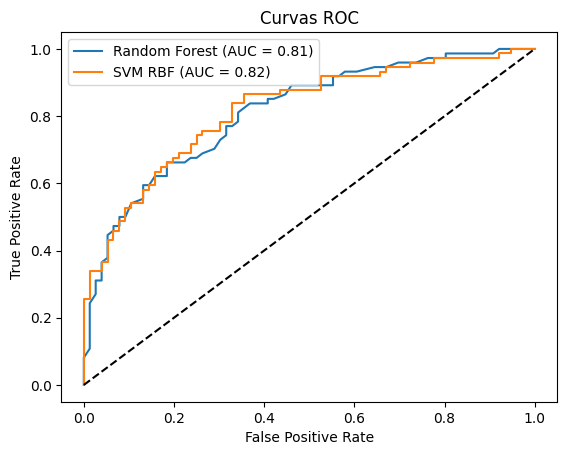

In [11]:
plt.figure()
for nome, modelo in modelos.items():
    plt.plot(modelo.fpr, modelo.tpr, label=f"{nome} (AUC = {modelo.roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC")
plt.legend()
plt.show()